# Treinando modelos

## Bibliotecas básicas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Regressão Linear

### Métodos dos mínimos quadrados

<p align='justify'>Função matemática que minimiza a função de custo: </p>

#### Gerando alguns dados com aparência linear

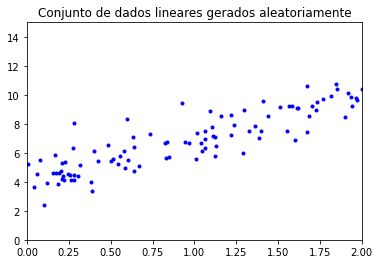

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.title('Conjunto de dados lineares gerados aleatoriamente')
plt.show()

#### Calculando o valor que minimiza a função de custo

In [3]:
X_b = np.c_[np.ones((100, 1)), X] #adiciona x0=1 a cada instância
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.08852275],
       [2.92498464]])

#### Fazendo previsões

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #adiciona x0=1 a cada instância
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.08852275],
       [9.93849202]])

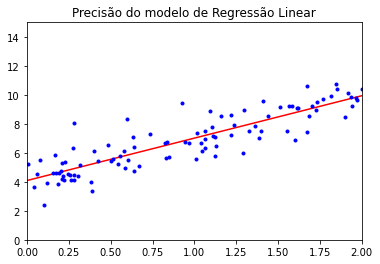

In [5]:
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.title('Precisão do modelo de Regressão Linear')
plt.show()

#### Equivalente usando Scikit-Learn

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.08852275]), array([[2.92498464]]))

In [7]:
lin_reg.predict(X_new)

array([[4.08852275],
       [9.93849202]])

### Gradiente descendente em lote

In [8]:
eta = 0.1 #taxa de aprendizado
n_interations = 1000
m = 100
theta = np.random.randn(2, 1) #inicialização aleatória

for interation in range(n_interations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta*gradients
theta

array([[4.08852275],
       [2.92498464]])

In [9]:
X_new_b.dot(theta)

array([[4.08852275],
       [9.93849202]])

#### Gradiente descendente com várias taxas de aprendizado

In [10]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, 'b.')
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = 'b-' if iteration > 0 else 'r--'
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel('$x_1$', fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

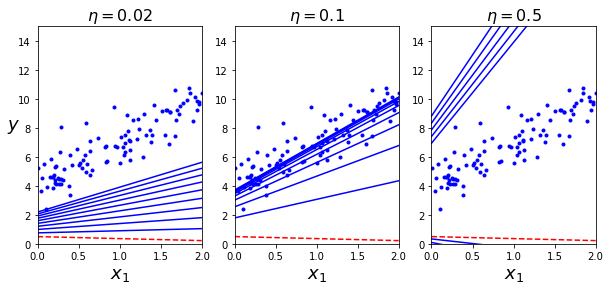

In [11]:
np.random.seed(42)
theta = np.random.randn(2,1)

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

### Gradiente descendente estocástico

Theta: [[4.04487056]
 [2.95113651]]


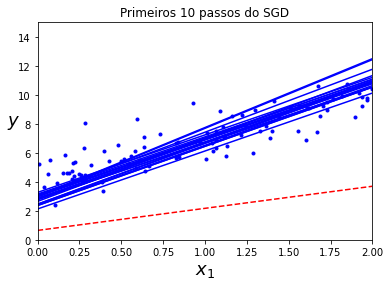

In [12]:
theta_path_sgd = []
n_epochs = 50
t0, t1 = 5, 50 #hiperparâmetros de aprendizado

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) #inicialização aleatória

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)           
            style = "b-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style) 
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
        
print(f'Theta: {theta}')
plt.plot(X, y, 'b.')                                 
plt.xlabel('$x_1$', fontsize=18)                     
plt.ylabel('$y$', rotation=0, fontsize=18)           
plt.axis([0, 2, 0, 15]) 
plt.title('Primeiros 10 passos do SGD')
plt.show()    

#### Scikit-learn

In [13]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=50, tol=-np.infty, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([4.10451972]), array([2.94219787]))